# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
output_data_file_2 = "../output_data/cities_clean.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
plt.ioff() 

In [2]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [4]:
#assign list variables to build data table.
City = []
Lat = []
Lng = []
Max_Temp= []
Humidity= []
Cloudiness= []
Wind_Speed= []
Country = []
Date = []

In [5]:
cities

['taolanaro',
 'basco',
 'nadym',
 'mana',
 'albany',
 'rikitea',
 'pimenta bueno',
 'lagoa',
 'mackay',
 'mangrul pir',
 'jizan',
 'sitka',
 'saskylakh',
 'bolungarvik',
 'atuona',
 'mataura',
 'karratha',
 'hamza',
 'vila franca do campo',
 'hobart',
 'scarborough',
 'zhangye',
 'ushuaia',
 'georgetown',
 'yarensk',
 'klaksvik',
 'coquimbo',
 'souillac',
 'severo-kurilsk',
 'khatanga',
 'la belgica',
 'hilo',
 'molteno',
 'bethel',
 'cape town',
 'butaritari',
 'springdale',
 'wodonga',
 'lasa',
 'diego de almagro',
 'tigil',
 'gannan',
 'kavieng',
 'belushya guba',
 'lebu',
 'busselton',
 'mayumba',
 'ponta do sol',
 'saleaula',
 'gamba',
 'hambantota',
 'illoqqortoormiut',
 'longyearbyen',
 'mar del plata',
 'punta arenas',
 'petatlan',
 'bluff',
 'sao joao da barra',
 'tateyama',
 'cabo san lucas',
 'nyandoma',
 'port alfred',
 'nikolskoye',
 'kapaa',
 'qostanay',
 'harbour breton',
 'riachao das neves',
 'chuy',
 'karaul',
 'leningradskiy',
 'barentsburg',
 'dikson',
 'mangrol',


In [6]:
#cities = ['new norfolk', 'barrow', 'barentsburg', 'staromaryevka', 'thompson', 'yumen', 'bathsheba',\
# 'ushuaia', 'yar-sale', 'nishihara', 'leningradskiy', 'iqaluit', 'severo-kurilsk']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
group_item_number = np.uint8(5)
i = np.uint8(0)
j = np.uint8(0)
item = np.uint16(0)
if len(cities)%group_item_number:
    group_number = int(len(cities) / group_item_number) + 1
else:
    group_number = len(cities) / group_item_number

for i in range(0, group_number):
    j=0
    while ((j < group_item_number) & (item < (len(cities)-1))):

        item = i * (group_item_number) + j
        city = cities[item]
        print(f'Processing record {item} of group {i} item {j} | {city}')
        try:
            response = requests.get(query_url + city).json()
            #City.append()
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Humidity.append(response['main']['humidity'])
            Cloudiness.append(response['clouds']['all'])
            Wind_Speed.append(response['wind']['speed'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
        except KeyError:
            print('Data for ',city,' not available.  Skipping......')
            Lat.append(np.nan)
            Lng.append(np.nan)
            Max_Temp.append(np.nan)
            Humidity.append(np.nan)
            Cloudiness.append(np.nan)
            Wind_Speed.append(np.nan)
            Country.append(np.nan)
            Date.append(np.nan)
        j = j + 1

Processing record 0 of group 0 item 0 | taolanaro
Data for  taolanaro  not available.  Skipping......
Processing record 1 of group 0 item 1 | basco
Processing record 2 of group 0 item 2 | nadym
Processing record 3 of group 0 item 3 | mana
Processing record 4 of group 0 item 4 | albany
Processing record 5 of group 1 item 0 | rikitea
Processing record 6 of group 1 item 1 | pimenta bueno
Processing record 7 of group 1 item 2 | lagoa
Processing record 8 of group 1 item 3 | mackay
Processing record 9 of group 1 item 4 | mangrul pir
Processing record 10 of group 2 item 0 | jizan
Processing record 11 of group 2 item 1 | sitka
Processing record 12 of group 2 item 2 | saskylakh
Processing record 13 of group 2 item 3 | bolungarvik
Data for  bolungarvik  not available.  Skipping......
Processing record 14 of group 2 item 4 | atuona
Processing record 15 of group 3 item 0 | mataura
Processing record 16 of group 3 item 1 | karratha
Processing record 17 of group 3 item 2 | hamza
Processing record 18 

Processing record 146 of group 29 item 1 | vardo
Processing record 147 of group 29 item 2 | narsaq
Processing record 148 of group 29 item 3 | tuktoyaktuk
Processing record 149 of group 29 item 4 | jardim
Processing record 150 of group 30 item 0 | haines junction
Processing record 151 of group 30 item 1 | madison
Processing record 152 of group 30 item 2 | havre-saint-pierre
Processing record 153 of group 30 item 3 | pisco
Processing record 154 of group 30 item 4 | nanortalik
Processing record 155 of group 31 item 0 | inirida
Processing record 156 of group 31 item 1 | lolua
Data for  lolua  not available.  Skipping......
Processing record 157 of group 31 item 2 | attawapiskat
Data for  attawapiskat  not available.  Skipping......
Processing record 158 of group 31 item 3 | ilulissat
Processing record 159 of group 31 item 4 | muros
Processing record 160 of group 32 item 0 | puerto escondido
Processing record 161 of group 32 item 1 | shuiji
Processing record 162 of group 32 item 2 | portlan

Processing record 288 of group 57 item 3 | svetlyy
Processing record 289 of group 57 item 4 | saint-augustin
Processing record 290 of group 58 item 0 | kahului
Processing record 291 of group 58 item 1 | iqaluit
Processing record 292 of group 58 item 2 | iquitos
Processing record 293 of group 58 item 3 | isangel
Processing record 294 of group 58 item 4 | zivinice
Processing record 295 of group 59 item 0 | mingaora
Processing record 296 of group 59 item 1 | bairnsdale
Processing record 297 of group 59 item 2 | sur
Processing record 298 of group 59 item 3 | borogontsy
Processing record 299 of group 59 item 4 | krasnoselkup
Processing record 300 of group 60 item 0 | kazerun
Processing record 301 of group 60 item 1 | srednekolymsk
Processing record 302 of group 60 item 2 | bilma
Processing record 303 of group 60 item 3 | serenje
Processing record 304 of group 60 item 4 | beloha
Processing record 305 of group 61 item 0 | cervo
Processing record 306 of group 61 item 1 | saint-francois
Process

Processing record 437 of group 87 item 2 | gat
Processing record 438 of group 87 item 3 | elban
Processing record 439 of group 87 item 4 | le vauclin
Processing record 440 of group 88 item 0 | kaduy
Processing record 441 of group 88 item 1 | asfi
Processing record 442 of group 88 item 2 | flin flon
Processing record 443 of group 88 item 3 | morondava
Processing record 444 of group 88 item 4 | pevek
Processing record 445 of group 89 item 0 | mount gambier
Processing record 446 of group 89 item 1 | novo aripuana
Processing record 447 of group 89 item 2 | bonthe
Processing record 448 of group 89 item 3 | sobradinho
Processing record 449 of group 89 item 4 | storsteinnes
Processing record 450 of group 90 item 0 | swellendam
Processing record 451 of group 90 item 1 | malatya
Processing record 452 of group 90 item 2 | rognan
Processing record 453 of group 90 item 3 | tilichiki
Processing record 454 of group 90 item 4 | mahon
Processing record 455 of group 91 item 0 | uelzen
Processing record

Processing record 583 of group 116 item 3 | naze
Processing record 584 of group 116 item 4 | kuytun
Processing record 585 of group 117 item 0 | lengshuijiang
Processing record 586 of group 117 item 1 | zeya
Processing record 587 of group 117 item 2 | vaitape
Processing record 588 of group 117 item 3 | bentiu
Processing record 589 of group 117 item 4 | alyangula
Processing record 590 of group 118 item 0 | kudahuvadhoo
Processing record 591 of group 118 item 1 | champerico
Processing record 592 of group 118 item 2 | belmonte
Processing record 593 of group 118 item 3 | kindia
Processing record 594 of group 118 item 4 | sabang
Processing record 595 of group 119 item 0 | cotonou
Processing record 596 of group 119 item 1 | sahrak
Data for  sahrak  not available.  Skipping......
Processing record 597 of group 119 item 2 | mayo
Processing record 598 of group 119 item 3 | atambua
Processing record 599 of group 119 item 4 | cuautlalpan
Processing record 600 of group 120 item 0 | batemans bay
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
main_df = pd.DataFrame({'city' : cities, 'Latitude' : Lat, 'Longitude': Lng, "Max temp, F": Max_Temp, "Humidity %" : Humidity, \
            "Cloudiness" : Cloudiness, 'Wind Speed, mph' : Wind_Speed, 'Country' : Country , 'Date' : Date})
len(main_df)
main_df

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,basco,20.45,121.97,84.42,74.0,2.0,5.17,PH,1.592232e+09
2,nadym,65.53,72.52,61.07,51.0,66.0,7.74,RU,1.592232e+09
3,mana,5.66,-53.78,79.93,82.0,99.0,3.33,GF,1.592232e+09
4,albany,42.60,-73.97,69.01,51.0,0.0,2.55,US,1.592232e+09
...,...,...,...,...,...,...,...,...,...
624,hobyo,5.35,48.53,81.45,70.0,46.0,30.91,SO,1.592232e+09
625,agirish,61.92,63.02,67.96,48.0,100.0,4.43,RU,1.592232e+09
626,gualeguay,-33.14,-59.31,53.91,51.0,57.0,9.40,AR,1.592232e+09
627,jinchengjiang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
main_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#there are no cities with humidity over 100%
main_df.loc[(main_df['Humidity %'] > 100)][:]

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = main_df.loc[(main_df['Humidity %'] > 100)].index
humidity_index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = main_df.drop(index = humidity_index)
clean_city_data

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,basco,20.45,121.97,84.42,74.0,2.0,5.17,PH,1.592232e+09
2,nadym,65.53,72.52,61.07,51.0,66.0,7.74,RU,1.592232e+09
3,mana,5.66,-53.78,79.93,82.0,99.0,3.33,GF,1.592232e+09
4,albany,42.60,-73.97,69.01,51.0,0.0,2.55,US,1.592232e+09
...,...,...,...,...,...,...,...,...,...
624,hobyo,5.35,48.53,81.45,70.0,46.0,30.91,SO,1.592232e+09
625,agirish,61.92,63.02,67.96,48.0,100.0,4.43,RU,1.592232e+09
626,gualeguay,-33.14,-59.31,53.91,51.0,57.0,9.40,AR,1.592232e+09
627,jinchengjiang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file_2)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

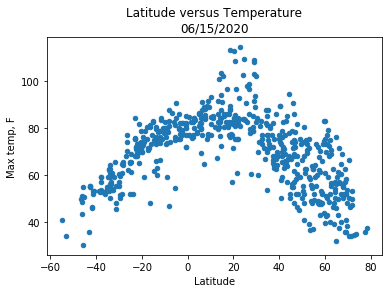

In [26]:
now = datetime.now()
date = now.strftime("%m/%d/%Y")
temperature_title = "Latitude versus Temperature\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Max temp, F', kind='scatter', title = temperature_title)
plt.show()

pretty clear correlation between latitude and temperature.

## Latitude vs. Humidity Plot

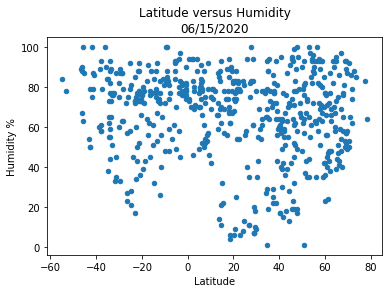

In [27]:
humidity_title = "Latitude versus Humidity\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Humidity %', kind='scatter', title = humidity_title)
plt.show()

Weak correlation between Humidity and latitude

## Latitude vs. Cloudiness Plot

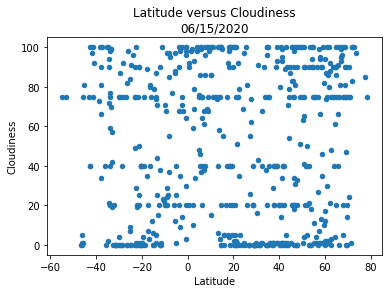

In [28]:
cloudiness_title = "Latitude versus Cloudiness\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Cloudiness', kind='scatter', title = cloudiness_title)
plt.show()

No correlation between latitude and Cloudiness

## Latitude vs. Wind Speed Plot

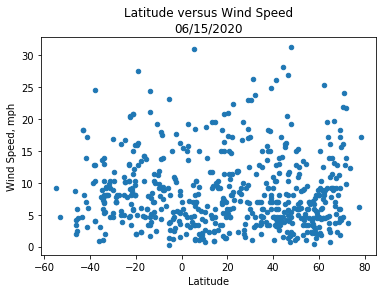

In [29]:
wind_speed_title = "Latitude versus Wind Speed\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Wind Speed, mph', kind='scatter', title = wind_speed_title)
plt.show()

No correlation between Wind Speed and latitude

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values, graph_title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    plt.scatter(x = x_values, y = y_values)
    return

In [38]:
# Create Northern and Southern Hemisphere DataFrames
#I created a dataframe of dataframes.  One is 'north' and the other 'south'
city_north_df = clean_city_data.loc[clean_city_data['Latitude'] >= 0][:]
city_south_df = clean_city_data.loc[clean_city_data['Latitude'] <= 0][:]
city_north_df.head()
city_south_df.head()
data_df = {'North' : city_north_df, 'South' : city_south_df}

#### Generate all graphs

In [39]:
#these 2 lists are used in for loops to go through each graph possibility and plot it.
hemisphere_list = ['North', 'South']
y_axis_data_list = ['Max temp, F', 'Humidity %', 'Cloudiness', 'Wind Speed, mph']

In [40]:
#this function simply takes in the slope, intercept and max and min latitudes
#it returns the corresponding y_values for plotting
def y_values(slope, intercept, x_max, x_min):
    y_max = slope * x_max + intercept
    y_min = slope * x_min + intercept
    return (y_max, y_min)

In [41]:
#main graphing function to complete all graphs.
def graph_function(hemisphere, y_axis_data):
    plt.figure()
    plt.scatter(x = data_df[hemisphere]['Latitude'], y = data_df[hemisphere][y_axis_data])
    plt.title('{}ern Hemisphere - {} vs. Latitude\n Linear Regression'.format(hemisphere, y_axis_data))
    slope, intercept, r_value, p_value, std_err = linregress(x = data_df[hemisphere]['Latitude'], y = data_df[hemisphere][y_axis_data])
    r_squared = r_value ** 2
    x_max = data_df[hemisphere]['Latitude'].max()
    x_min = data_df[hemisphere]['Latitude'].min()
    y_max, y_min = y_values(slope, intercept, x_max, x_min)
    x_line = [x_max, x_min]
    y_line = [y_max, y_min]
    #print(y_max)
    plt.plot(x_line, y_line, color = 'red')
    text_equation = 'y = {:.2f} * x + {:.2f}\nr**2 = {:.4f}'.format(slope, intercept, r_squared)
    plt.text(x_min, y_max,text_equation, color = 'r', bbox=dict(facecolor='w', alpha=0.5))
    plt.legend(['correlation', 'raw data'] , bbox_to_anchor=(1.05, 1), loc = 'upper left')
    filename = "./plots/graph%sern_hemisphere_and_%s.png" % (hemisphere, y_axis_data)
    plt.savefig(filename, bbox_inches='tight')
    #this line is key to making the graphs plot one after another
    plt.show()


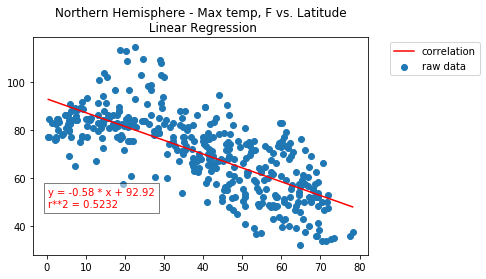

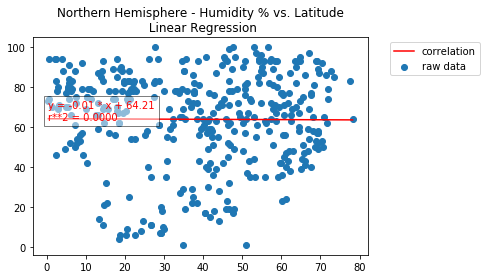

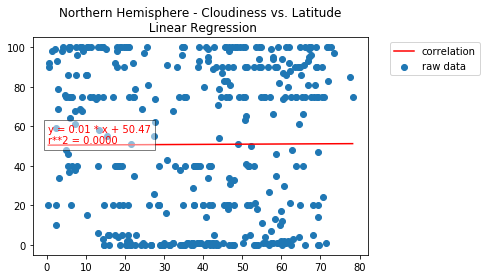

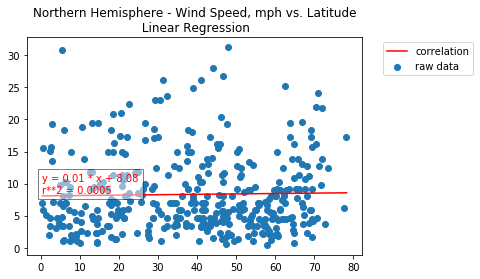

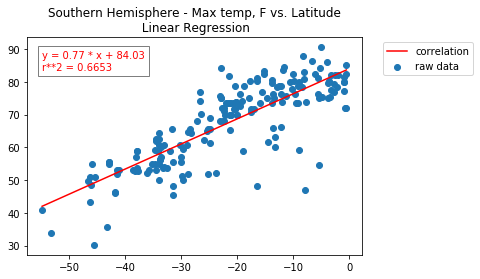

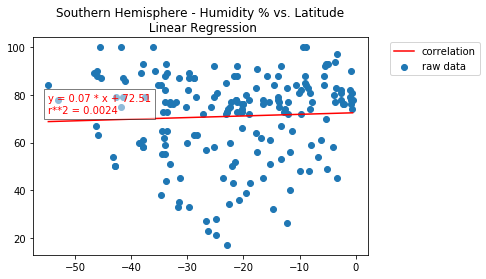

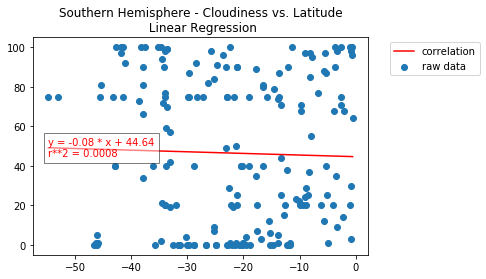

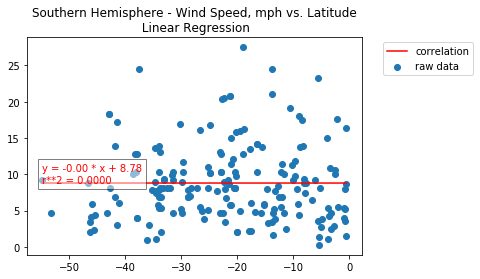

In [43]:
#This loop goes through both hemispheres and then all of the y-axis data that is required.
#values are defined in lists that that then reference the dataframe of dataframes.  One for nothern
#and one for southern hemispheres.
for hemisphere in hemisphere_list:
    for y_axis_data in y_axis_data_list:
        graph_function(hemisphere, y_axis_data)



The graphs pretty much speak for themselves.  Only observed correlation with Max Temperature.  All other variables seem to not correlate.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression